# Understanding train and test data

In [1]:
import os
import numpy as np
import pandas as pd
import re
from time import time
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import scipy.stats as stats
from collections import Counter
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits
from sklearn.metrics import mean_squared_error
pd.set_option("display.latex.repr", True)
directory = os.path.join("c:\\","path")
%matplotlib inline

## Upload train and test files

In [2]:
path = '/Users/varshabhat/Desktop/DL/Data-Science-Portfolio/Housing Price Prediction -  using Regression/'
train_set = pd.read_csv(path + 'train.csv')
test_set = pd.read_csv(path + 'test.csv')
#ids = test_set['Id']

## Preview of Train Set

In [3]:
print ("\n\n---------------------")
print ("TRAIN SET INFORMATION")
print ("---------------------")
print ("Shape of training set:", train_set.shape, "\n")
print ("Column Headers:", list(train_set.columns.values), "\n")



---------------------
TRAIN SET INFORMATION
---------------------
Shape of training set: (1460, 81) 

Column Headers: ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'G

## Preview of Test Set

In [4]:
print ("\n\n--------------------")
print ("TEST SET INFORMATION")
print ("--------------------")
print ("Shape of test set:", test_set.shape, "\n")
print ("Column Headers:", list(test_set.columns.values), "\n")
#print (test_set.describe(), "\n\n")
#print (test_set.dtypes)



--------------------
TEST SET INFORMATION
--------------------
Shape of test set: (1459, 80) 

Column Headers: ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCo

## Identifying variables - categorical or numerical

In [5]:
s = (train_set.dtypes == 'object')
object_cols = list(s[s].index)
t = (train_set.dtypes != 'object') 
int_cols = list(t[t].index)
print('Columns with integer datatype')
print('------------------------------')
print(int_cols)
print('---------------------------------------------------------------------------------------------------------------------')
print('Columns with object datatype')
print('------------------------------')
print(object_cols)

Columns with integer datatype
------------------------------
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
---------------------------------------------------------------------------------------------------------------------
Columns with object datatype
------------------------------
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Ext

### Find unique values for columns with datatype - object

In [6]:
print('Unique values under columns with object datatype')
print('------------------------------')
for i in object_cols:
    print(i)
    print('---------------------')
    print(train_set[i].unique())

Unique values under columns with object datatype
------------------------------
MSZoning
---------------------
['RL' 'RM' 'C (all)' 'FV' 'RH']
Street
---------------------
['Pave' 'Grvl']
Alley
---------------------
[nan 'Grvl' 'Pave']
LotShape
---------------------
['Reg' 'IR1' 'IR2' 'IR3']
LandContour
---------------------
['Lvl' 'Bnk' 'Low' 'HLS']
Utilities
---------------------
['AllPub' 'NoSeWa']
LotConfig
---------------------
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope
---------------------
['Gtl' 'Mod' 'Sev']
Neighborhood
---------------------
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1
---------------------
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2
---------------------
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' '

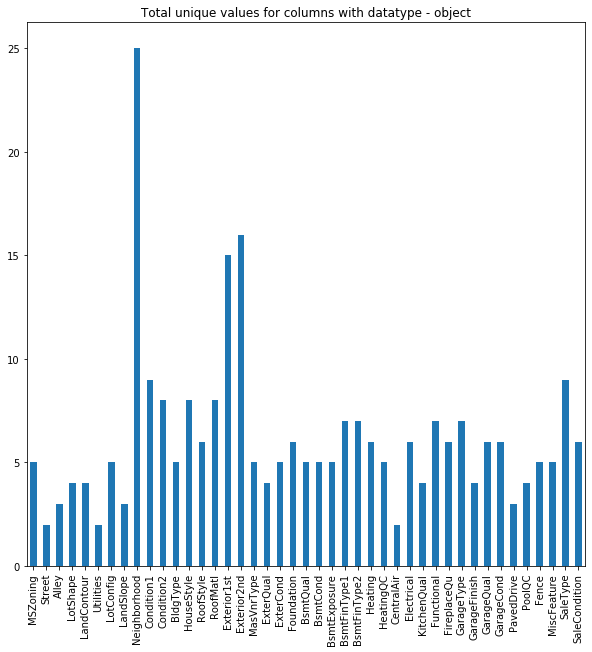

In [7]:
train_set[object_cols].apply(lambda x: len(x.unique())).plot.bar(figsize = (10, 10),title = 'Total unique values for columns with datatype - object')

Neighborhood columns has the most number of unique values

### Find unique values for columns with datatype - integer/float
We assume that if number of unique values are greater than 100 then they are continuous values

In [8]:
print('Unique values under columns with object datatype')
print('------------------------------')
num_labels = [i for i in int_cols if len(train_set[i].unique()) < 200]
num_labels

Unique values under columns with object datatype
------------------------------


['MSSubClass',
 'LotFrontage',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF2',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

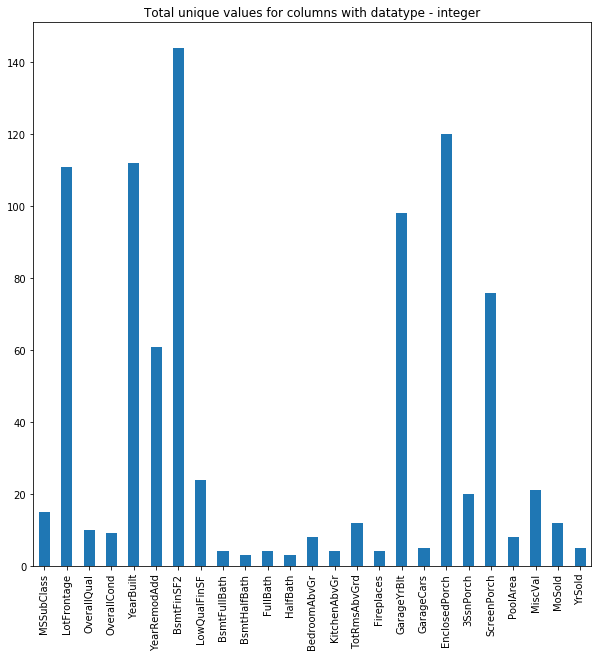

In [9]:
train_set[num_labels].apply(lambda x: len(x.unique())).plot.bar(figsize = (10, 10),title = 'Total unique values for columns with datatype - integer')

# Pre-Processing and Cleaning Data

## Find all columns with missing values

### Missing values - Train set

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64


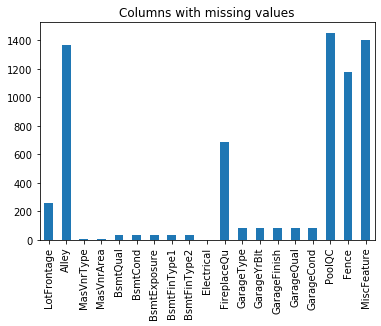

In [10]:
# Get names of columns with missing values
cols_with_missing = [col for col in train_set.columns
                     if train_set[col].isnull().any()]
print(train_set[cols_with_missing].isnull().sum()/len(train_set))
train_set[cols_with_missing].isnull().sum().plot.bar(title = 'Columns with missing values')

### Missing values - Test set

LotFrontage     0.155586
Alley           0.926662
MasVnrType      0.010966
MasVnrArea      0.010281
BsmtQual        0.030158
BsmtCond        0.030843
BsmtExposure    0.030158
BsmtFinType1    0.028787
BsmtFinType2    0.028787
Electrical      0.000000
FireplaceQu     0.500343
GarageType      0.052090
GarageYrBlt     0.053461
GarageFinish    0.053461
GarageQual      0.053461
GarageCond      0.053461
PoolQC          0.997944
Fence           0.801234
MiscFeature     0.965045
dtype: float64


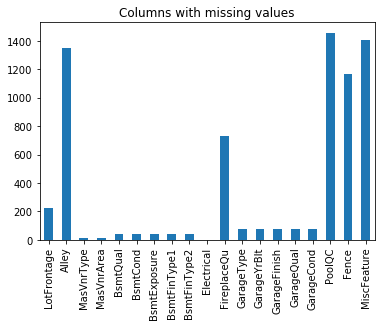

In [11]:
# Get names of columns with missing values
cols_with_missing = [col for col in test_set.columns
                     if train_set[col].isnull().any()]
print(test_set[cols_with_missing].isnull().sum()/len(test_set))
test_set[cols_with_missing].isnull().sum().plot.bar(title = 'Columns with missing values')

### Imputation for missing values in object type column

Columns with the max percenatge of missing values:<br />
- PoolQC
- MiscFeature
- Fence
- Alley
- FireplaceQu
- Lotfrontage

It's possible that houses that do not have values for these columns do not have the features.


#### Imputation for top 5 columns with the highest fraction of missing values 

In [12]:
train_set['PoolQC'].fillna('None', inplace = True)
train_set['MiscFeature'].fillna('None', inplace = True)
train_set['Fence'].fillna('None', inplace = True)
train_set['Alley'].fillna('None', inplace = True)
train_set['FireplaceQu'].fillna('None', inplace = True)


test_set['PoolQC'].fillna('None', inplace = True)
test_set['MiscFeature'].fillna('None', inplace = True)
test_set['Fence'].fillna('None', inplace = True)
test_set['Alley'].fillna('None', inplace = True)
test_set['FireplaceQu'].fillna('None', inplace = True)


##### Garage 

GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
dtype: float64


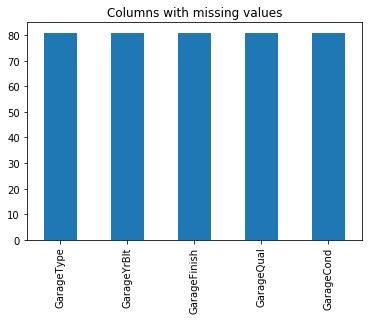

In [13]:
cols_with_missing = [col for col in train_set.columns
                    if train_set[col].isnull().any() and 'Garage' in col]
print(train_set[cols_with_missing].isnull().sum()/len(train_set))
train_set[cols_with_missing].isnull().sum().plot.bar(title = 'Columns with missing values')

GarageType      0.052090
GarageYrBlt     0.053461
GarageFinish    0.053461
GarageCars      0.000685
GarageArea      0.000685
GarageQual      0.053461
GarageCond      0.053461
dtype: float64


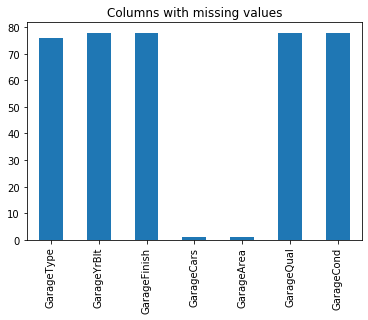

In [14]:
cols_with_missing = [col for col in test_set.columns
                     if test_set[col].isnull().any() and 'Garage' in col]
print(test_set[cols_with_missing].isnull().sum()/len(test_set))
test_set[cols_with_missing].isnull().sum().plot.bar(title = 'Columns with missing values')

Based on the plot above we can assume that the missing values for Garage correspond to houses with no Garage
In this case we can replace the Nan values with 'None' and add an additional column with True/False for garage

MSZoning        0.002742
LotFrontage     0.155586
Utilities       0.001371
Exterior1st     0.000685
Exterior2nd     0.000685
MasVnrType      0.010966
MasVnrArea      0.010281
BsmtQual        0.030158
BsmtCond        0.030843
BsmtExposure    0.030158
BsmtFinType1    0.028787
BsmtFinSF1      0.000685
BsmtFinType2    0.028787
BsmtFinSF2      0.000685
BsmtUnfSF       0.000685
TotalBsmtSF     0.000685
BsmtFullBath    0.001371
BsmtHalfBath    0.001371
KitchenQual     0.000685
Functional      0.001371
GarageYrBlt     0.053461
SaleType        0.000685
dtype: float64


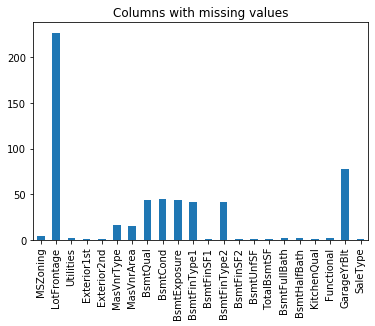

In [15]:
for df in [train_set, test_set]:
    df['GarageType'].fillna('None', inplace = True)
    df['GarageArea'].fillna(0, inplace = True)
    df['GarageFinish'].fillna('None', inplace = True)
    df['GarageQual'].fillna('None', inplace = True)
    df['GarageCond'].fillna('None', inplace = True)
    df['GarageCars'].fillna(0, inplace = True)
    df['GarageArea'].fillna(0, inplace = True)
cols_with_missing = [col for col in test_set.columns
                     if test_set[col].isnull().any()]
print(test_set[cols_with_missing].isnull().sum()/len(test_set))
test_set[cols_with_missing].isnull().sum().plot.bar(title = 'Columns with missing values')

#### Filling missing values for object dtype columns with most recurring values

In [16]:
s = (train_set.dtypes == 'object')
t = (train_set.dtypes != 'object') 
int_cols = list(t[t].index)
train_set.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  None      Reg   
1   2          20       RL         80.0     9600   Pave  None      Reg   
2   3          60       RL         68.0    11250   Pave  None      IR1   
3   4          70       RL         60.0     9550   Pave  None      IR1   
4   5          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0   None  None        None       0      2   
1         Lvl    AllPub  ...        0   None  None        None       0      5   
2         Lvl    AllPub  ...        0   None  None        None       0      9   
3         Lvl    AllPub  ...        0   None  None        None       0      2   
4         Lvl    AllPub  ...        0   None  None        None       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [17]:
#train_set[object_cols].fillna(train_set[object_cols].value_counts().idxmax())

train_set['GarageYrBlt'].fillna(0)
test_set['GarageYrBlt'].fillna(0)

for i in object_cols:
    print(i, train_set[i].value_counts().idxmax())
    train_set[i].fillna(train_set[i].value_counts().idxmax(), inplace = True)
    test_set[i].fillna(test_set[i].value_counts().idxmax(), inplace = True)
train_set.head(5)

MSZoning RL
Street Pave
Alley None
LotShape Reg
LandContour Lvl
Utilities AllPub
LotConfig Inside
LandSlope Gtl
Neighborhood NAmes
Condition1 Norm
Condition2 Norm
BldgType 1Fam
HouseStyle 1Story
RoofStyle Gable
RoofMatl CompShg
Exterior1st VinylSd
Exterior2nd VinylSd
MasVnrType None
ExterQual TA
ExterCond TA
Foundation PConc
BsmtQual TA
BsmtCond TA
BsmtExposure No
BsmtFinType1 Unf
BsmtFinType2 Unf
Heating GasA
HeatingQC Ex
CentralAir Y
Electrical SBrkr
KitchenQual TA
Functional Typ
FireplaceQu None
GarageType Attchd
GarageFinish Unf
GarageQual TA
GarageCond TA
PavedDrive Y
PoolQC None
Fence None
MiscFeature None
SaleType WD
SaleCondition Normal


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  None      Reg   
1   2          20       RL         80.0     9600   Pave  None      Reg   
2   3          60       RL         68.0    11250   Pave  None      IR1   
3   4          70       RL         60.0     9550   Pave  None      IR1   
4   5          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0   None  None        None       0      2   
1         Lvl    AllPub  ...        0   None  None        None       0      5   
2         Lvl    AllPub  ...        0   None  None        None       0      9   
3         Lvl    AllPub  ...        0   None  None        None       0      2   
4         Lvl    AllPub  ...        0   None  None        None       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

### Imputation for missing values in object type column

#### Filling missing values for categorial dtypes 

In [18]:
for i in num_labels:
    train_set[i].fillna(train_set[i].value_counts().idxmax(), inplace = True)
    test_set[i].fillna(test_set[i].value_counts().idxmax(), inplace = True)


#### Filling missing values for int dtype columns with most recurring values - with continuous values

In [19]:
int_cols.remove('SalePrice')
for i in int_cols:
    if i not in num_labels:
        train_set[i].fillna(0, inplace = True)
        test_set[i].fillna(0, inplace = True)

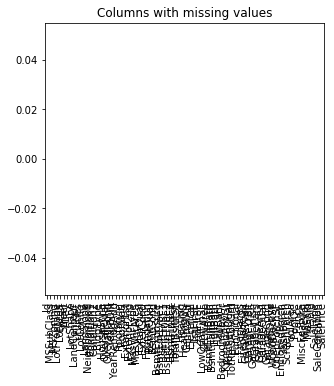

In [20]:
#Sanity check to see columns that still have missing values
train_set.isnull().sum().plot.bar(title = 'Columns with missing values', figsize = (5,5))

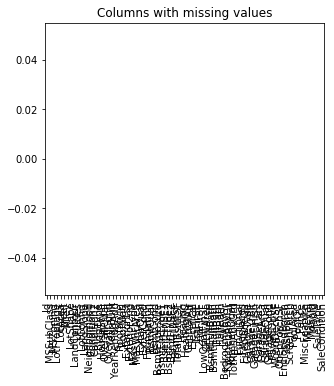

In [21]:
test_set.isnull().sum().plot.bar(title = 'Columns with missing values', figsize = (5,5))

## Split train and test into X_train, y_train and X_test

In [22]:
y_train = train_set['SalePrice']
X_train = train_set.drop('SalePrice', axis = 1)
X_test = test_set
X_train.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  None      Reg   
1   2          20       RL         80.0     9600   Pave  None      Reg   
2   3          60       RL         68.0    11250   Pave  None      IR1   
3   4          70       RL         60.0     9550   Pave  None      IR1   
4   5          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub  ...           0        0   None  None        None   
1         Lvl    AllPub  ...           0        0   None  None        None   
2         Lvl    AllPub  ...           0        0   None  None        None   
3         Lvl    AllPub  ...           0        0   None  None        None   
4         Lvl    AllPub  ...           0        0   None  None        None   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      2    2008        WD         Normal  
1       0      5    2007        WD         Normal  
2       0      9    2008        WD         Normal  
3       0      2    2006        WD        Abnorml  
4       0     12    2008        WD         Normal  

[5 rows x 80 columns]

## Convert data into labels

In [23]:
from sklearn.preprocessing import LabelEncoder

def label_assignments(df1,df2):
    label_encoder = LabelEncoder()
    object_cols = []
    df3 = df1.copy()
    df4 = df2.copy()
    for i in df1.columns:
        print(i, df1[i].dtype)
        if (df1[i].dtype == 'O' or df1[i].dtype == 'bool' or df1[i].dtype == 'object') and len(df1[i].unique()) < 150:
            df3[i] = label_encoder.fit_transform(df1[i])
            df4[i] = label_encoder.transform(df2[i])
    return df3, df4
X_train, X_test = label_assignments(X_train, X_test)

Id int64
MSSubClass int64
MSZoning object
LotFrontage float64
LotArea int64
Street object
Alley object
LotShape object
LandContour object
Utilities object
LotConfig object
LandSlope object
Neighborhood object
Condition1 object
Condition2 object
BldgType object
HouseStyle object
OverallQual int64
OverallCond int64
YearBuilt int64
YearRemodAdd int64
RoofStyle object
RoofMatl object
Exterior1st object
Exterior2nd object
MasVnrType object
MasVnrArea float64
ExterQual object
ExterCond object
Foundation object
BsmtQual object
BsmtCond object
BsmtExposure object
BsmtFinType1 object
BsmtFinSF1 int64
BsmtFinType2 object
BsmtFinSF2 int64
BsmtUnfSF int64
TotalBsmtSF int64
Heating object
HeatingQC object
CentralAir object
Electrical object
1stFlrSF int64
2ndFlrSF int64
LowQualFinSF int64
GrLivArea int64
BsmtFullBath int64
BsmtHalfBath int64
FullBath int64
HalfBath int64
BedroomAbvGr int64
KitchenAbvGr int64
KitchenQual object
TotRmsAbvGrd int64
Functional object
Fireplaces int64
FireplaceQu object

In [24]:
X_train.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0   1          60         3         65.0     8450       1      1         3   
1   2          20         3         80.0     9600       1      1         3   
2   3          60         3         68.0    11250       1      1         0   
3   4          70         3         60.0     9550       1      1         0   
4   5          60         3         84.0    14260       1      1         0   

   LandContour  Utilities  ...  ScreenPorch  PoolArea  PoolQC  Fence  \
0            3          0  ...            0         0       3      4   
1            3          0  ...            0         0       3      4   
2            3          0  ...            0         0       3      4   
3            3          0  ...            0         0       3      4   
4            3          0  ...            0         0       3      4   

   MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0            1        0       2    2008         8              4  
1            1        0       5    2007         8              4  
2            1        0       9    2008         8              4  
3            1        0       2    2006         8              0  
4            1        0      12    2008         8              4  

[5 rows x 80 columns]

In [25]:
X_test.head(5)

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0  1461          20         2         80.0    11622       1      1         3   
1  1462          20         3         81.0    14267       1      1         0   
2  1463          60         3         74.0    13830       1      1         0   
3  1464          60         3         78.0     9978       1      1         0   
4  1465         120         3         43.0     5005       1      1         0   

   LandContour  Utilities  ...  ScreenPorch  PoolArea  PoolQC  Fence  \
0            3          0  ...          120         0       3      2   
1            3          0  ...            0         0       3      4   
2            3          0  ...            0         0       3      2   
3            3          0  ...            0         0       3      4   
4            1          0  ...          144         0       3      4   

   MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0            1        0       6    2010         8              4  
1            0    12500       6    2010         8              4  
2            1        0       3    2010         8              4  
3            1        0       6    2010         8              4  
4            1        0       1    2010         8              4  

[5 rows x 80 columns]

# Feature Engineering

## Checking Correlation between features

In [26]:
data = X_train.iloc[:,1:-1]
label_encoder = LabelEncoder()
data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')

In [27]:
corr = data.corr()

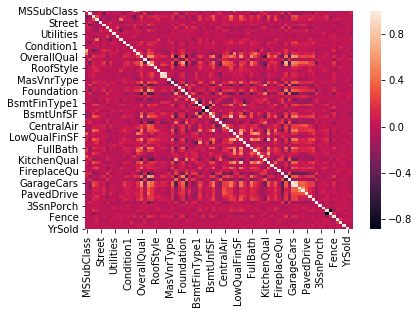

In [28]:
sns.heatmap(corr)

In [29]:
columns = np.full((corr.shape[0],), True, dtype=bool)
highly_correlated = []
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]

In [30]:
for i in X_train.columns:
    if i not in selected_columns:
        print(i)
    

Id
SaleCondition


## Distribution of SalePrice

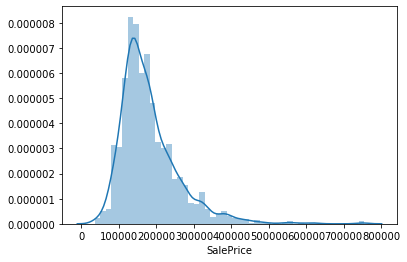

In [31]:
sns.distplot(y_train)

In [32]:
X_train.drop(['Id'],axis = 1, inplace = True)
X_test.drop(['Id'],axis = 1, inplace = True)

<Figure size 864x432 with 0 Axes>

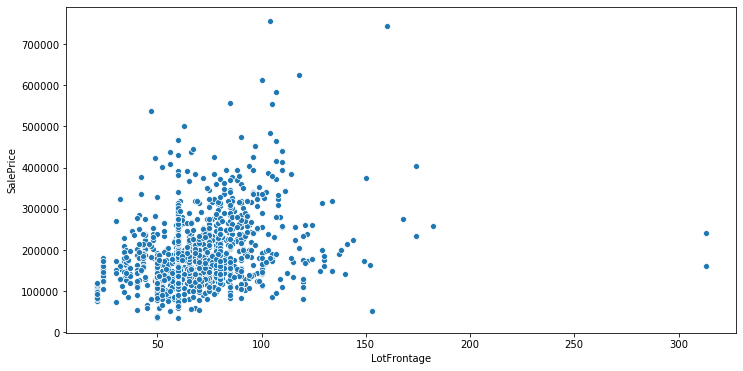

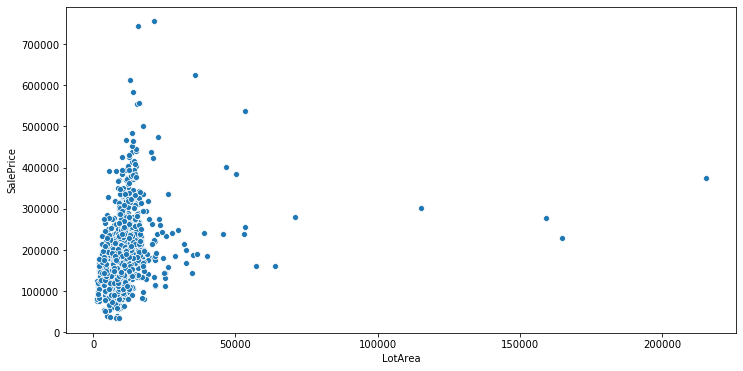

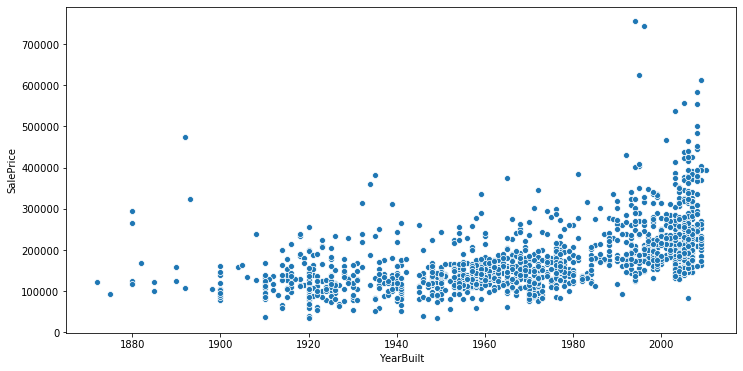

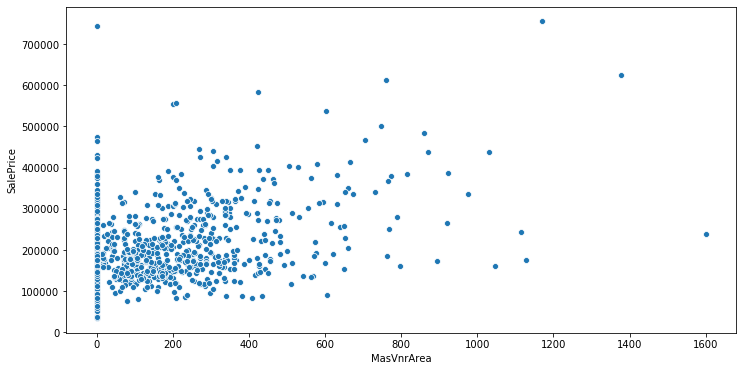

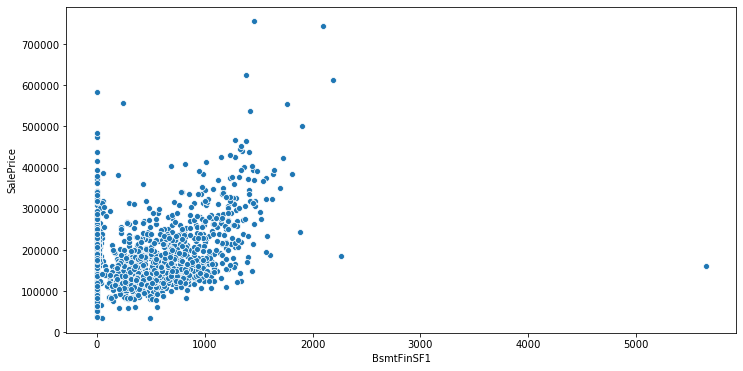

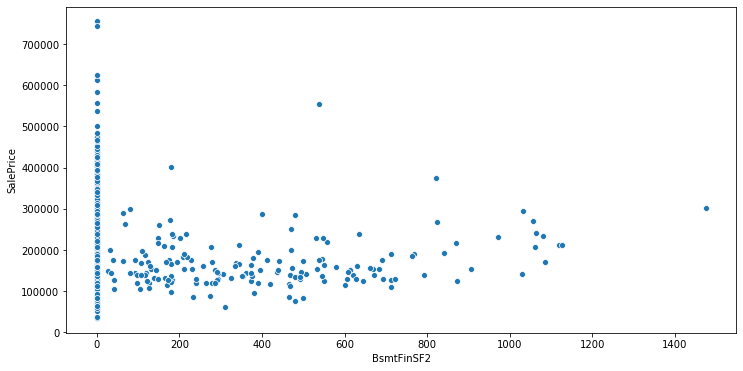

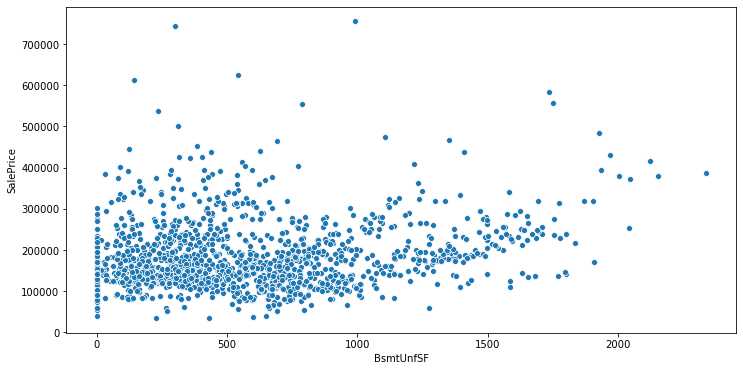

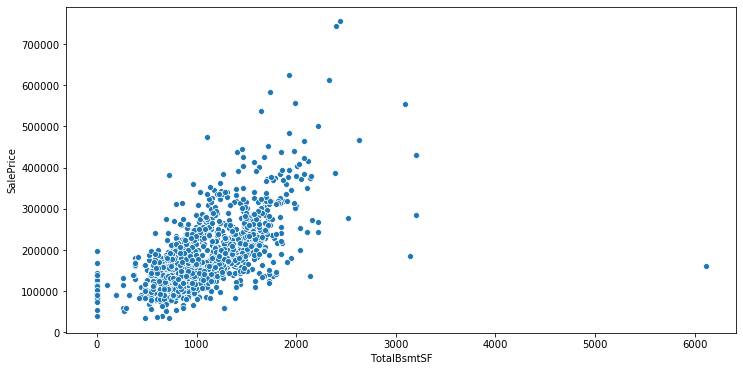

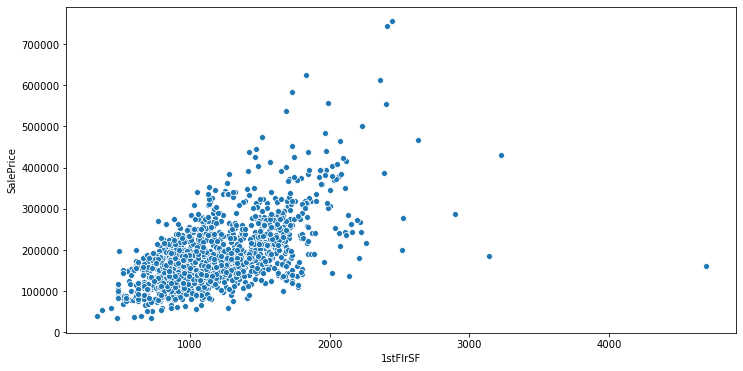

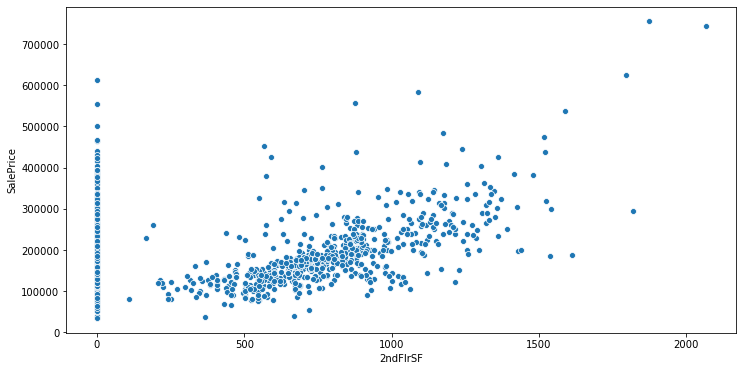

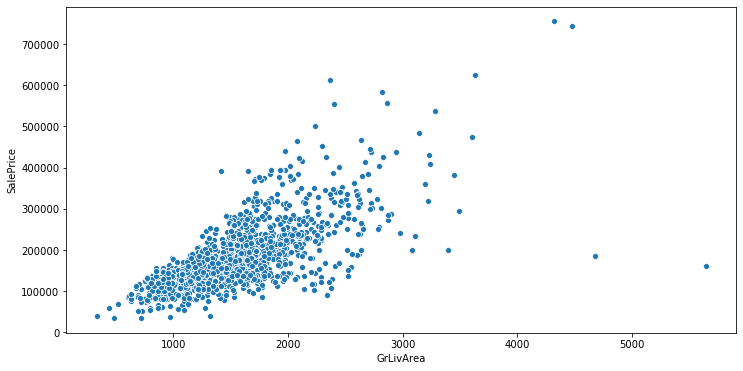

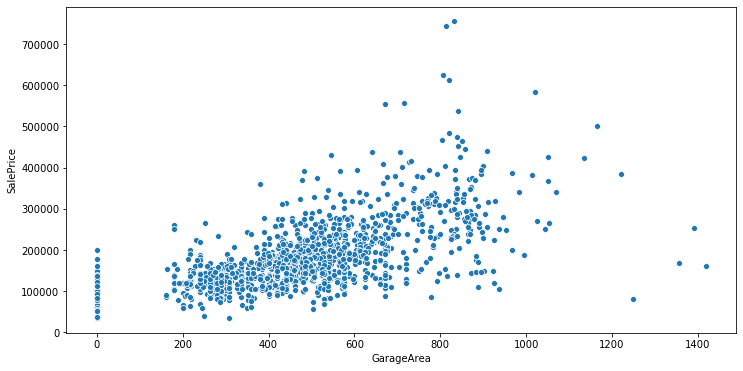

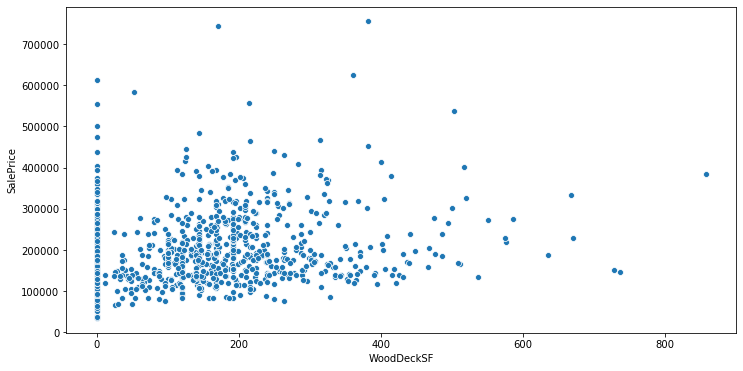

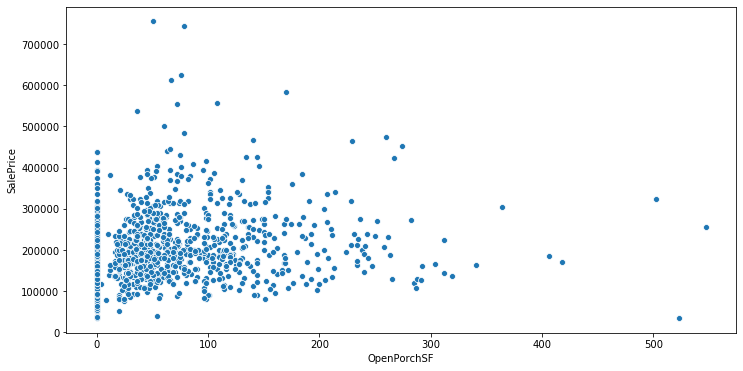

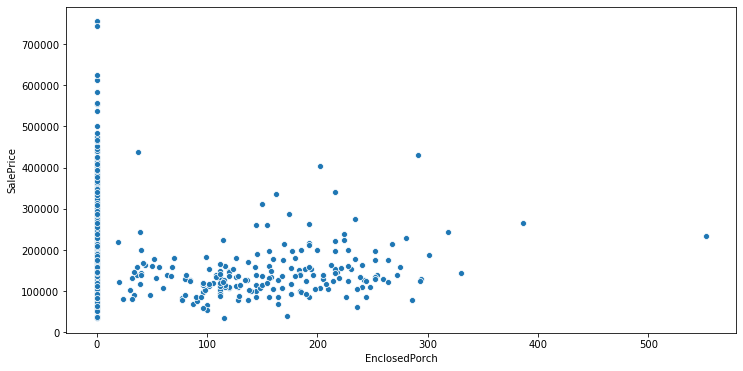

In [33]:
pair_plot_cols = [i for i in X_train.columns if len(X_train[i].unique()) > 100]
plt.figure(figsize=(12,6))
df = X_train
df = df.loc[:, (df != 0).any(axis=0)]
for i in pair_plot_cols:
    plt.figure(figsize=(12,6))
    sns.scatterplot(x= df[i] , y=y_train)

/Users/varshabhat/anaconda3/envs/python-37/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<Figure size 864x432 with 0 Axes>

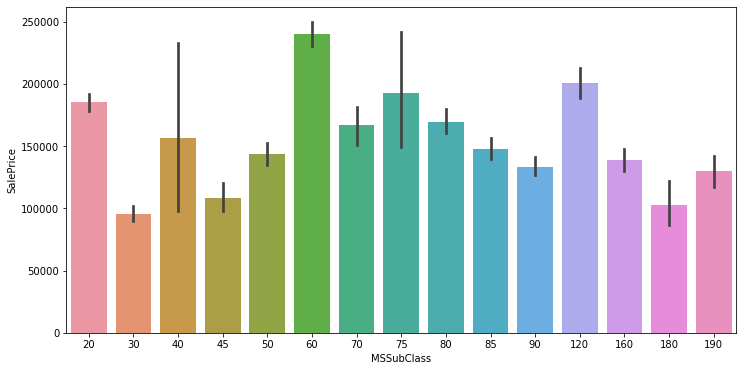

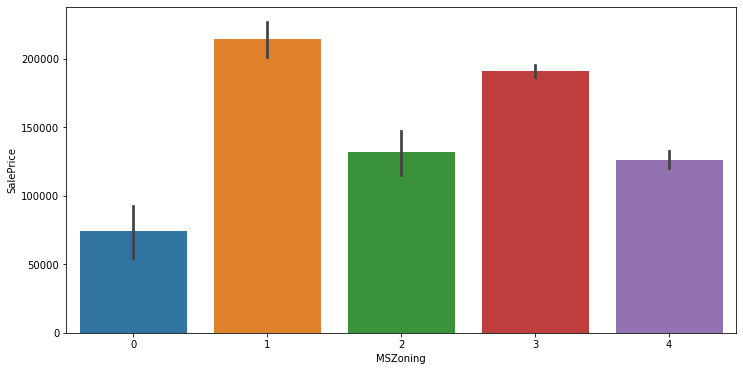

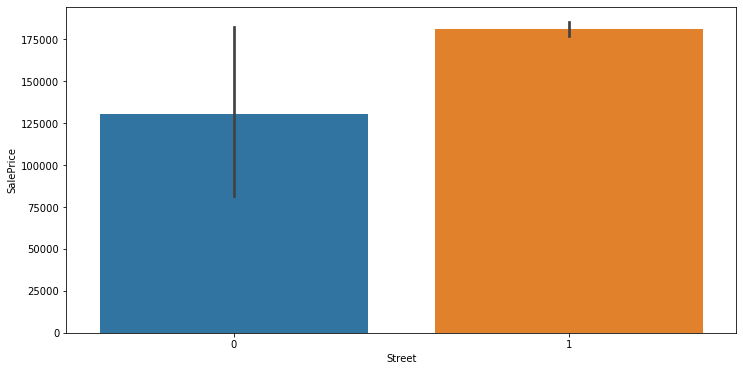

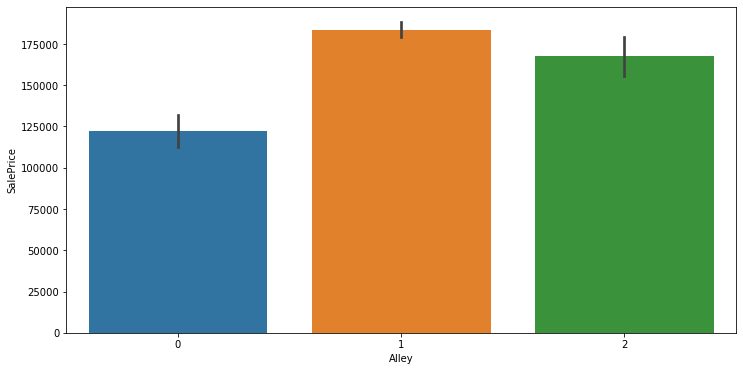

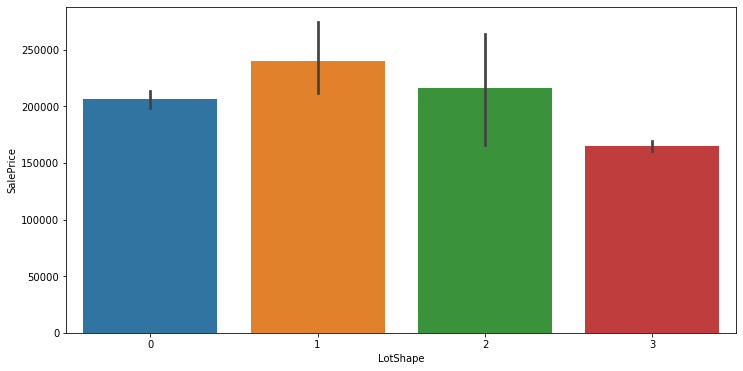

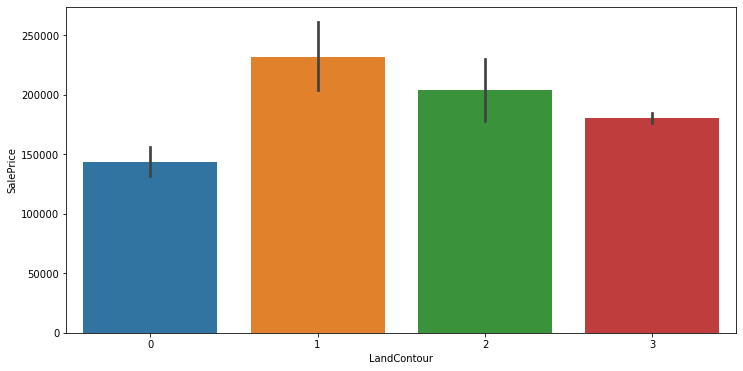

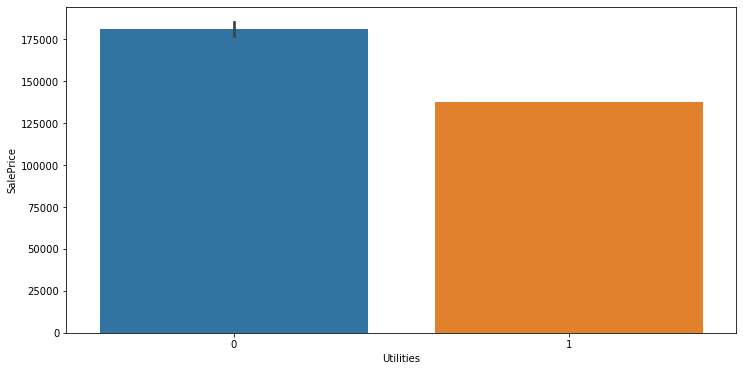

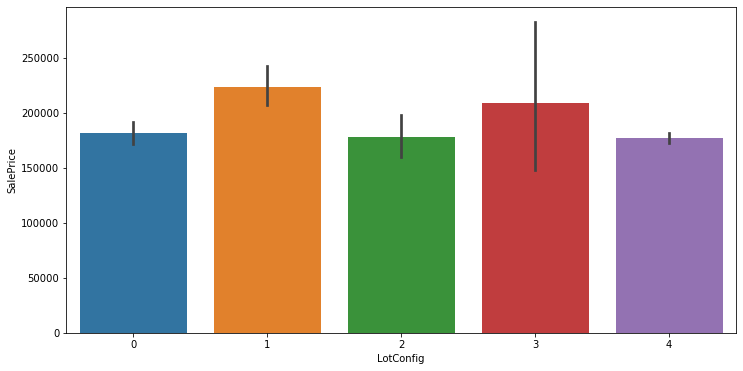

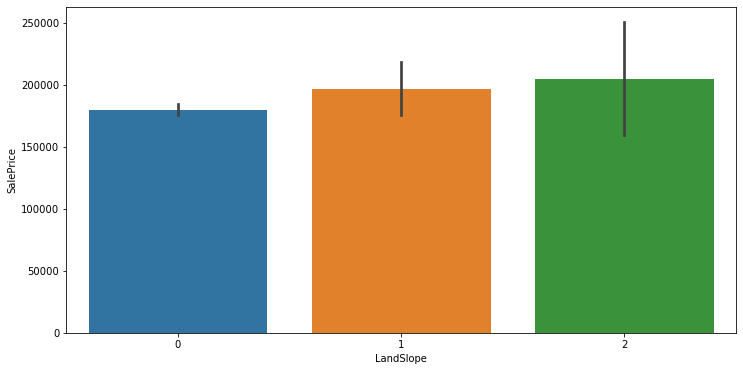

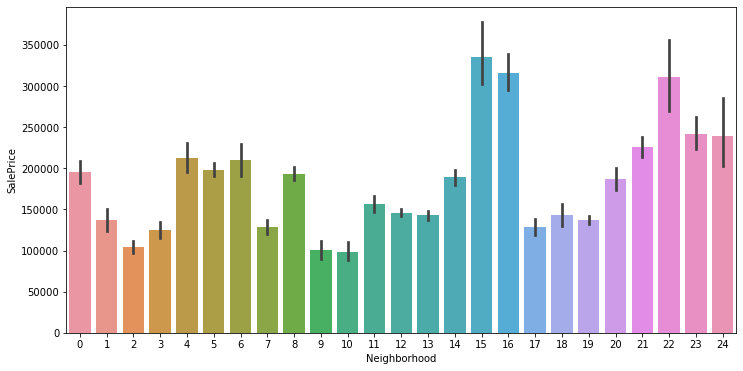

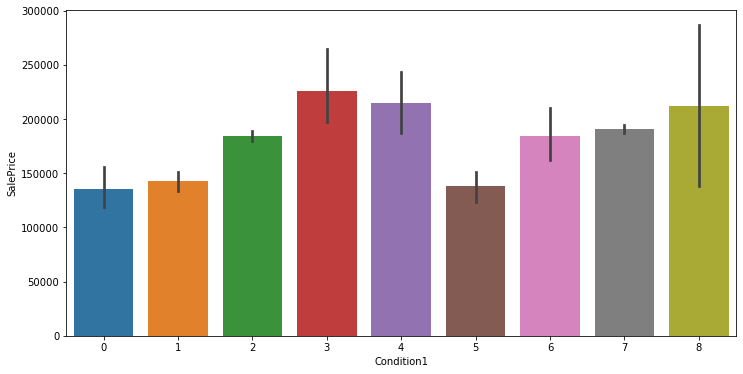

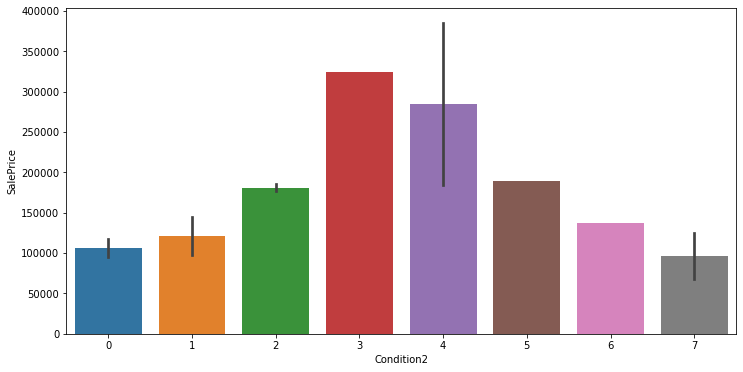

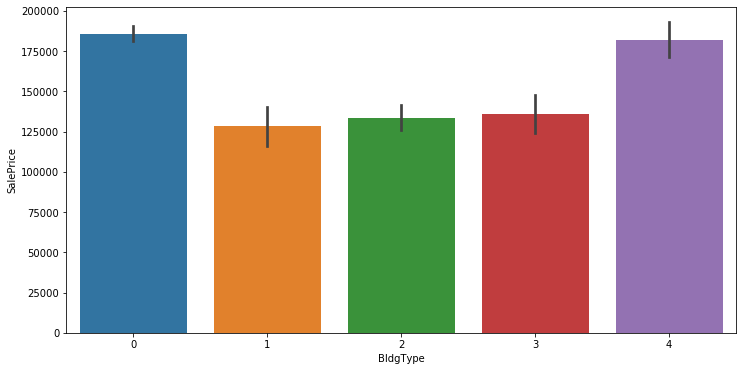

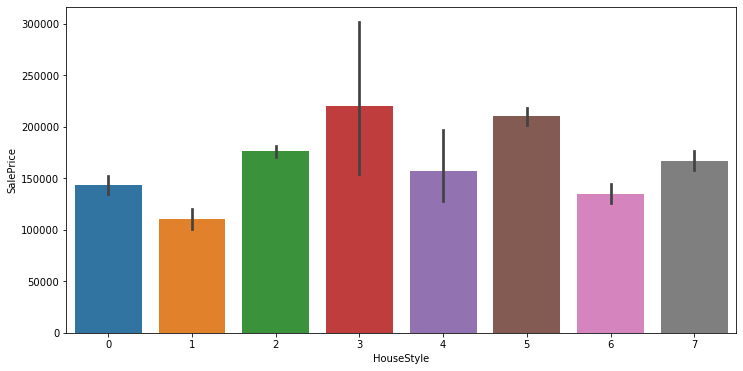

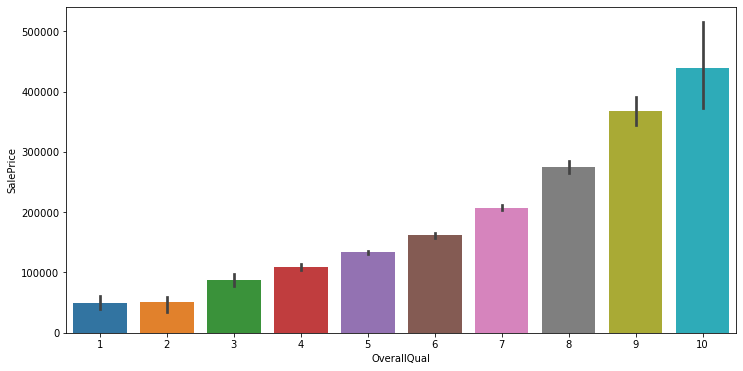

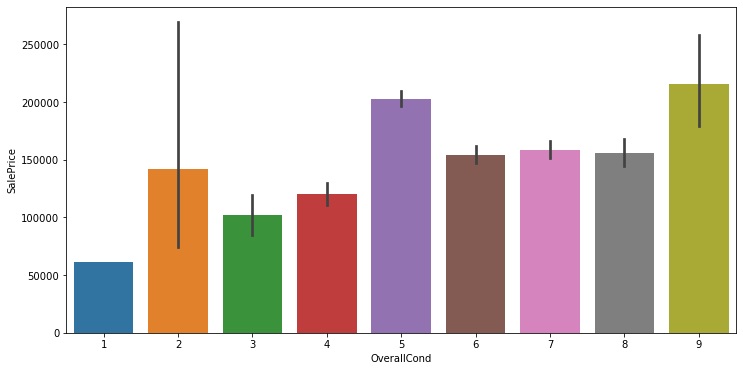

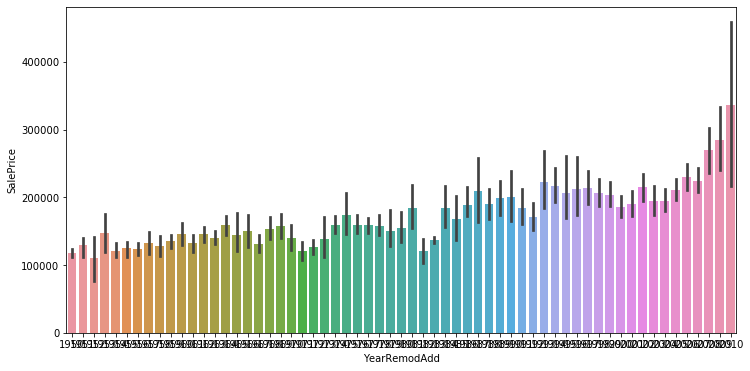

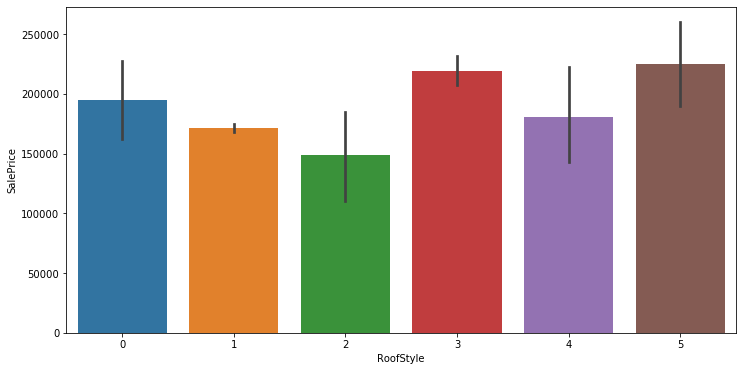

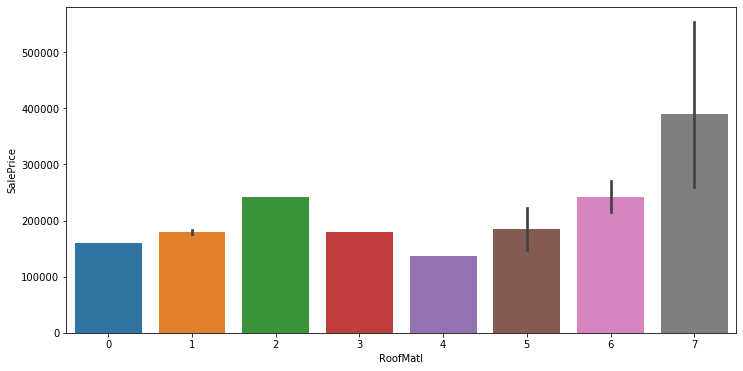

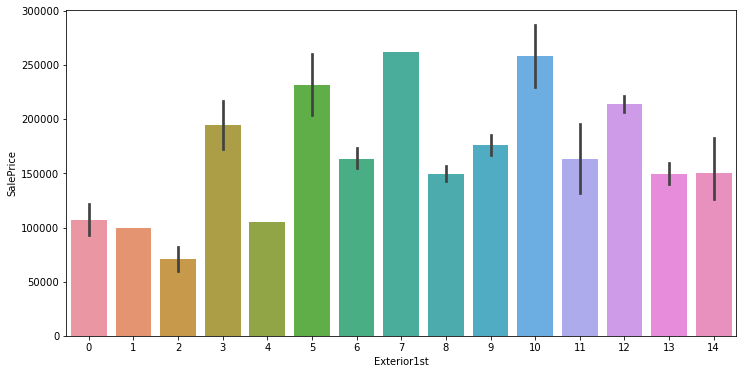

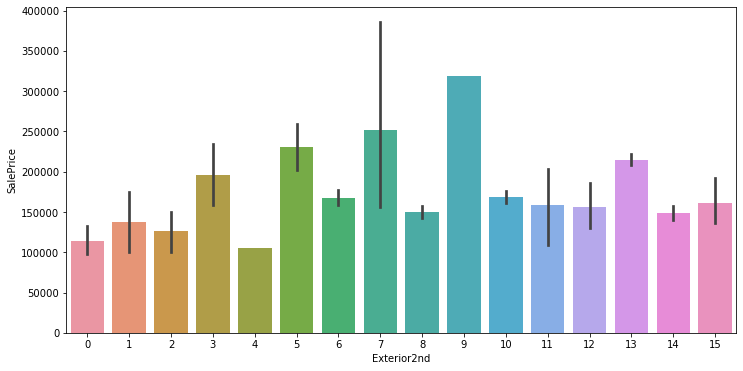

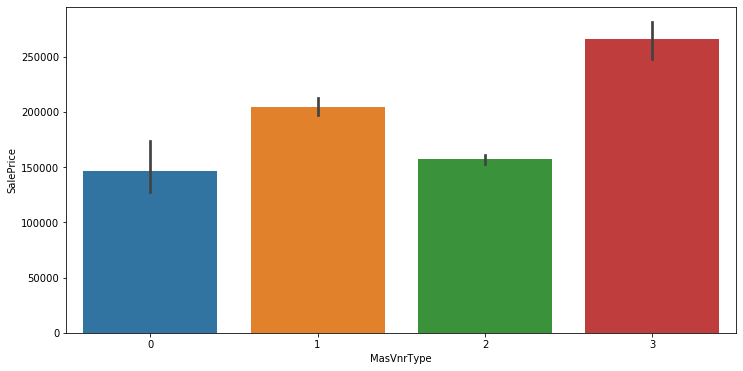

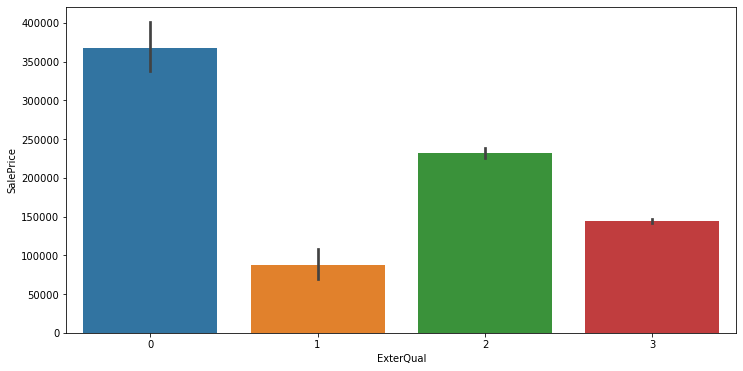

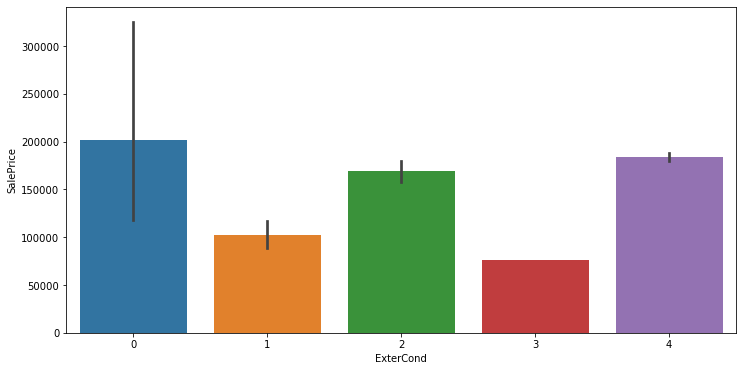

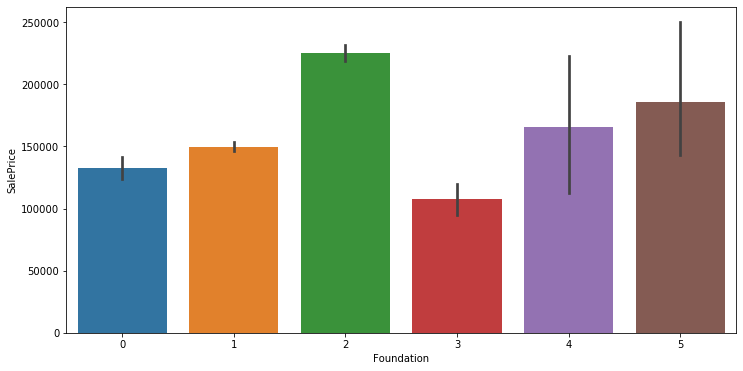

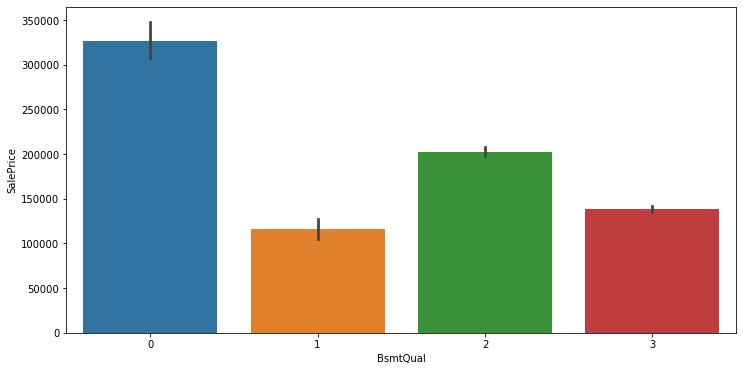

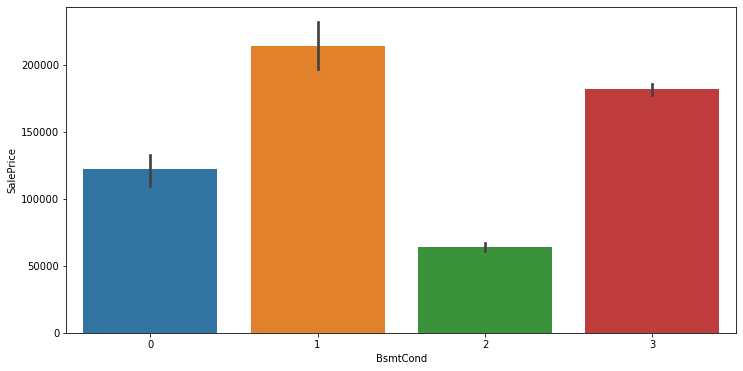

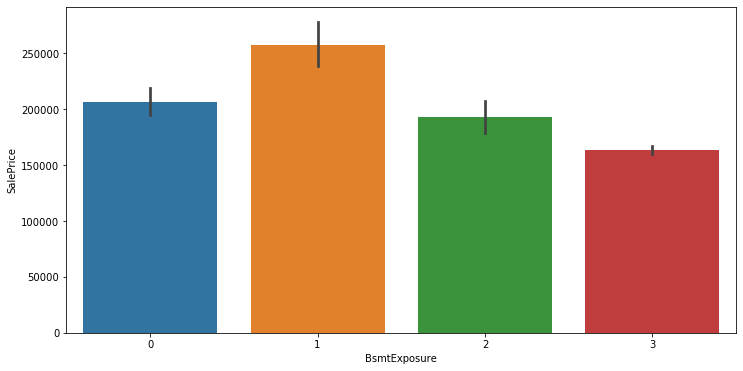

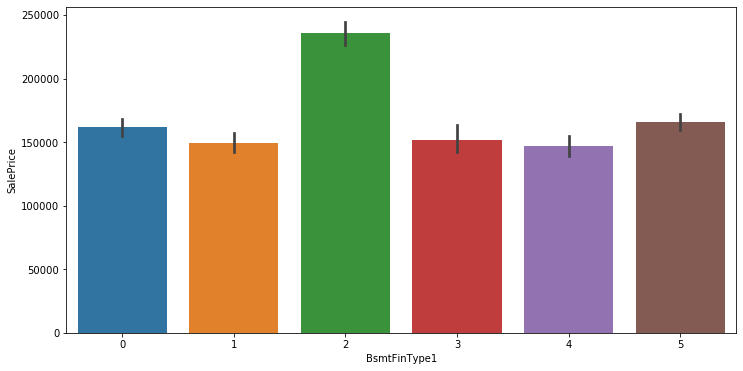

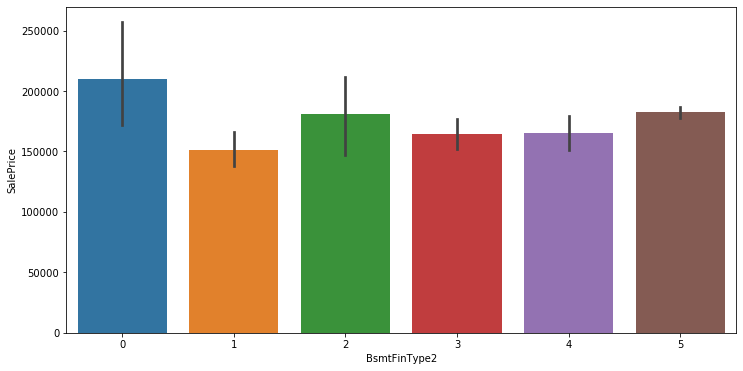

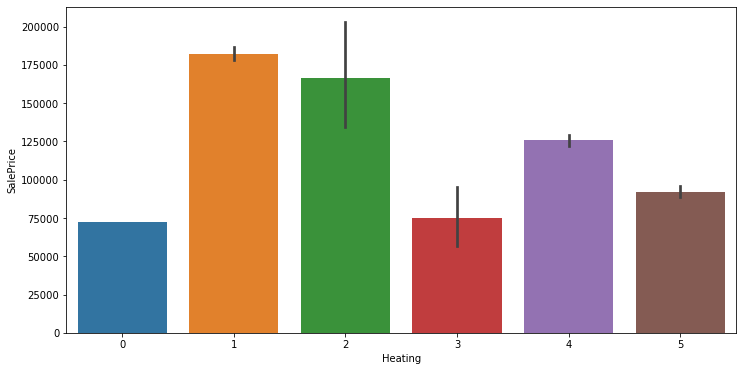

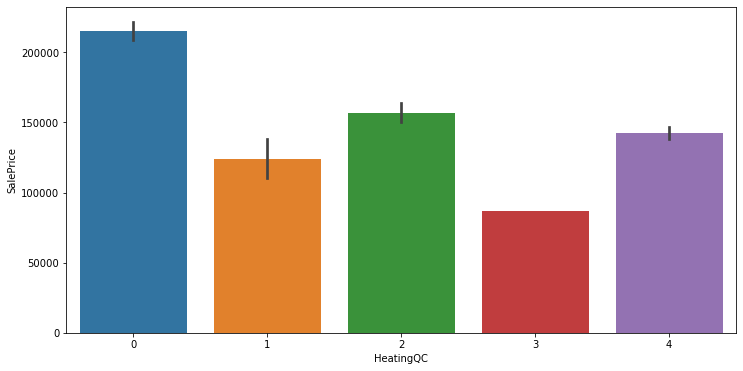

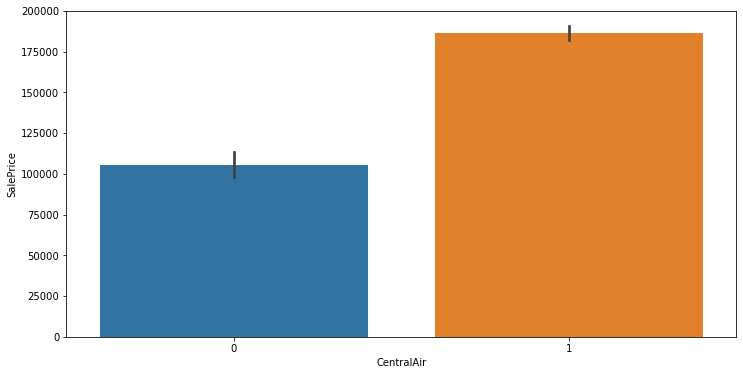

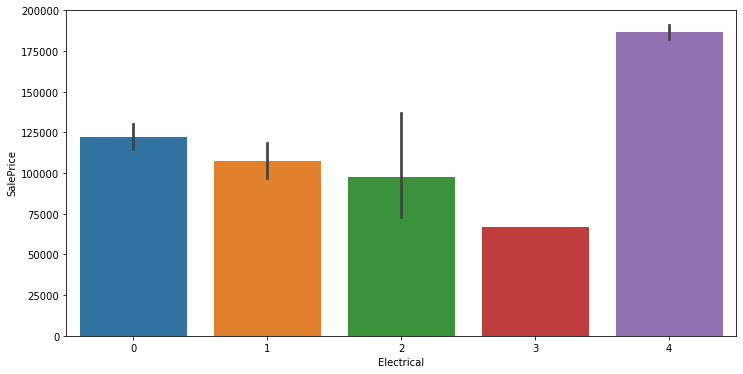

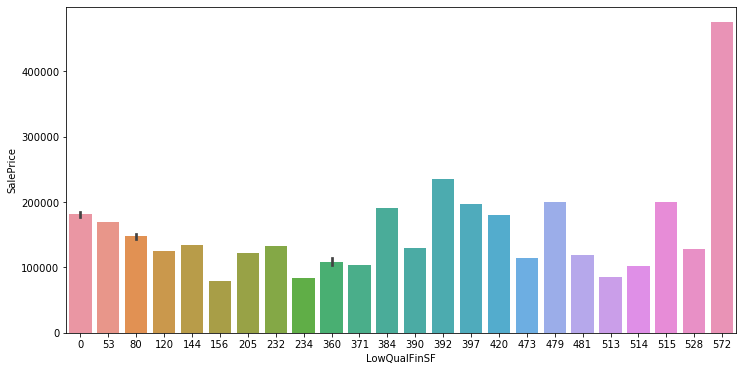

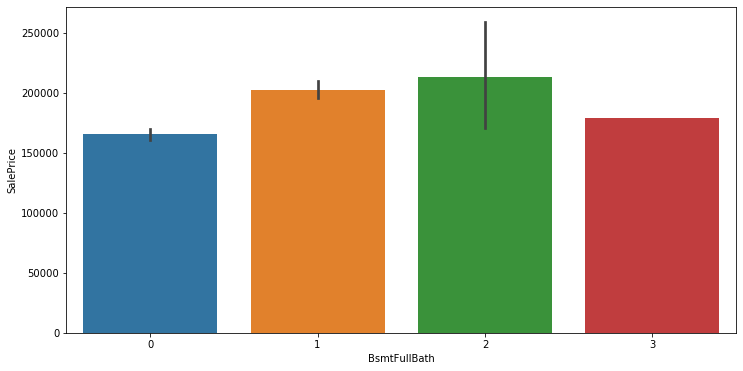

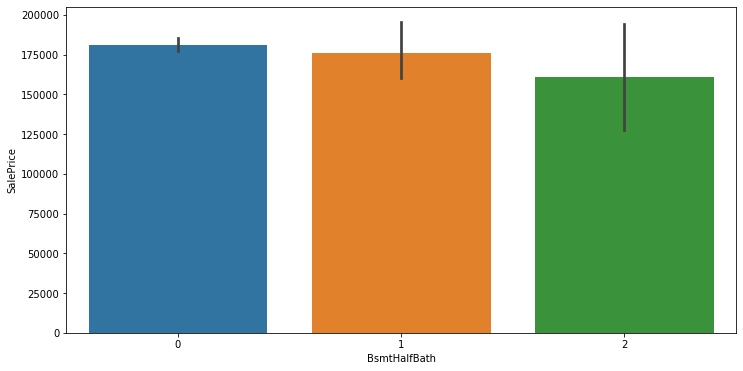

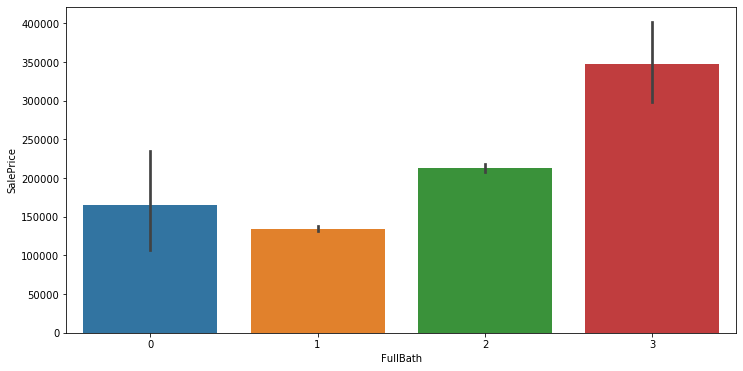

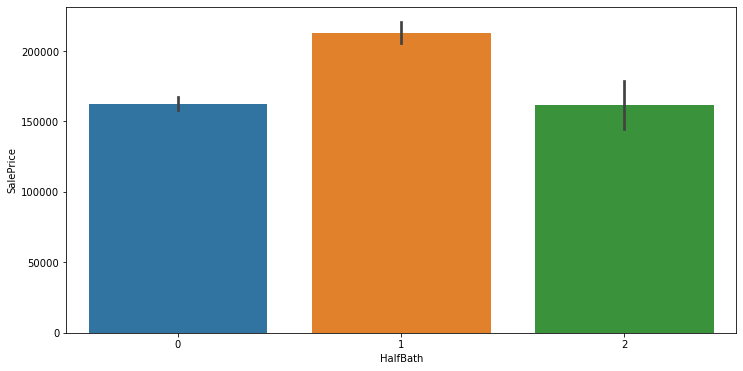

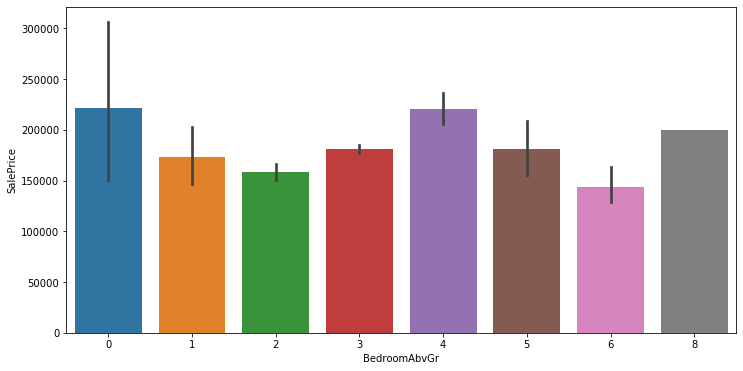

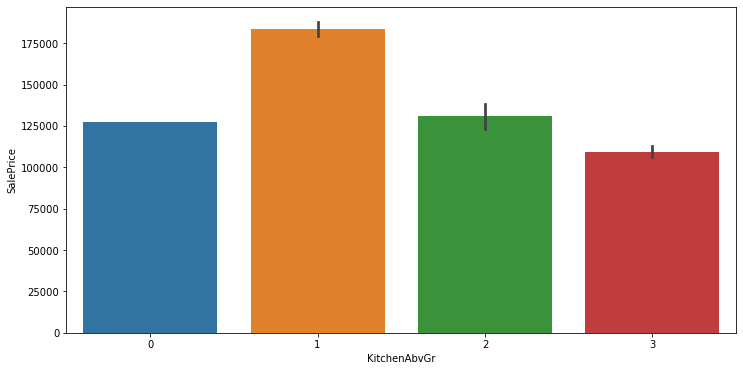

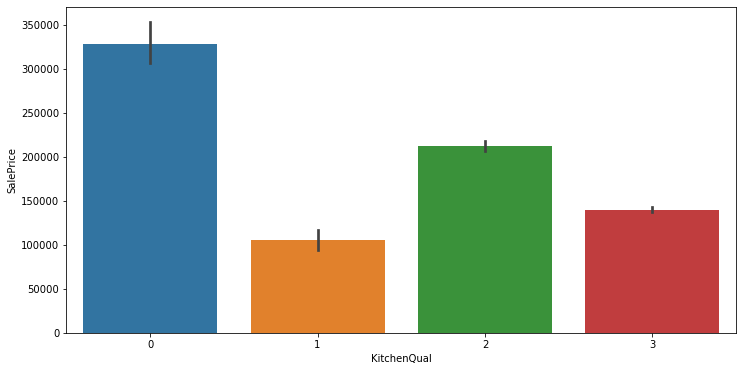

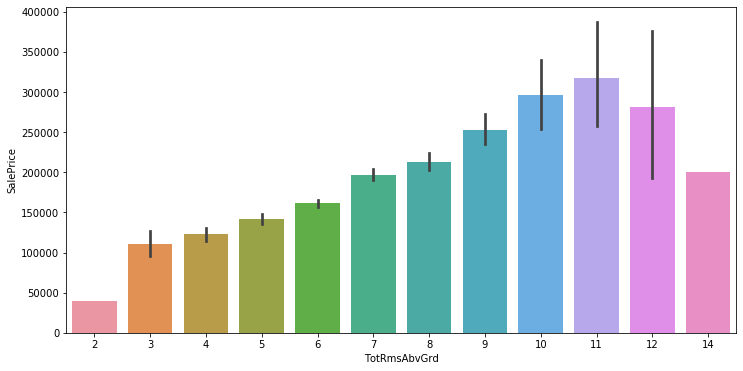

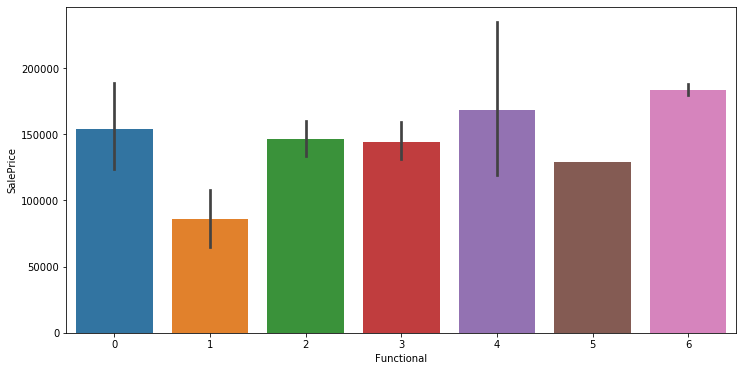

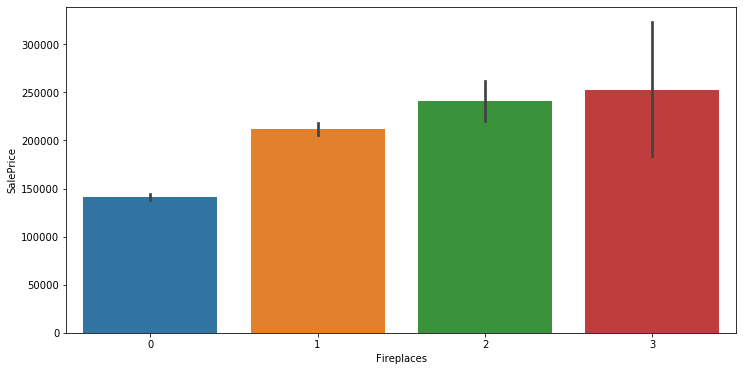

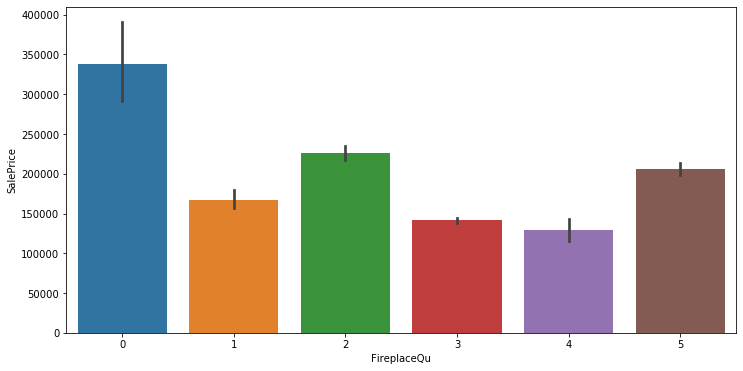

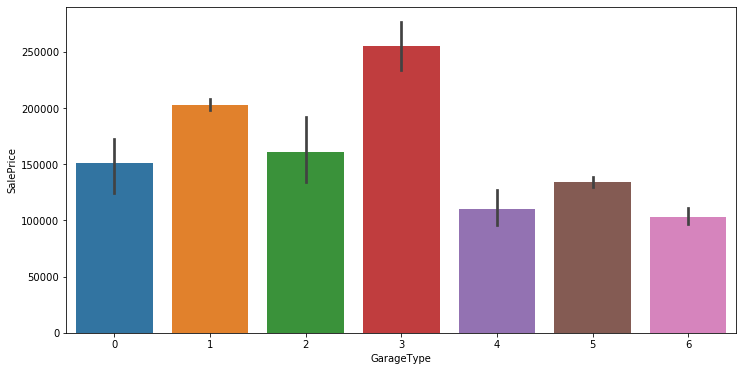

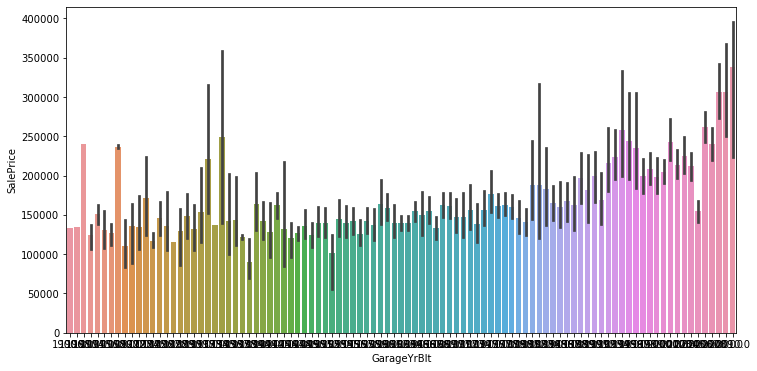

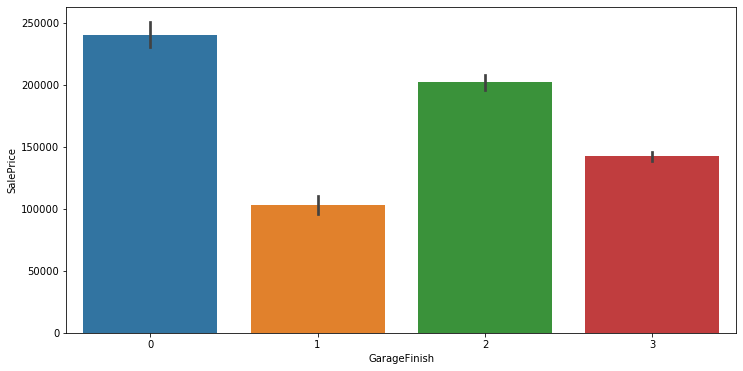

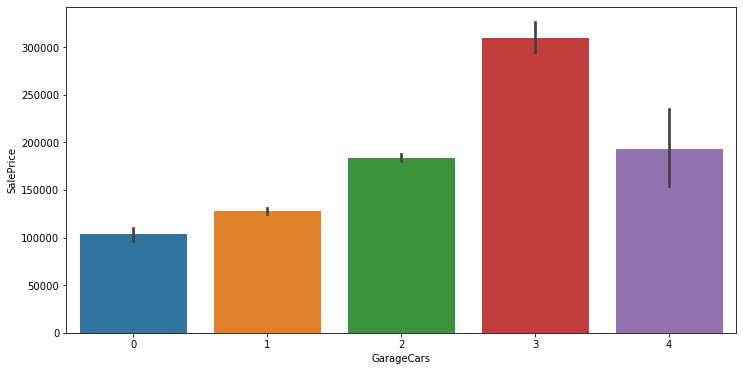

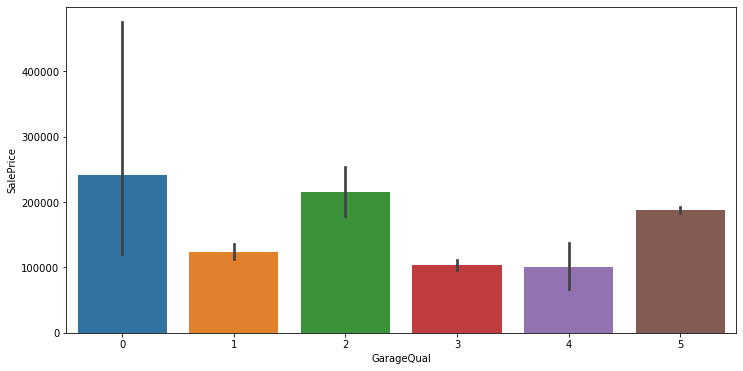

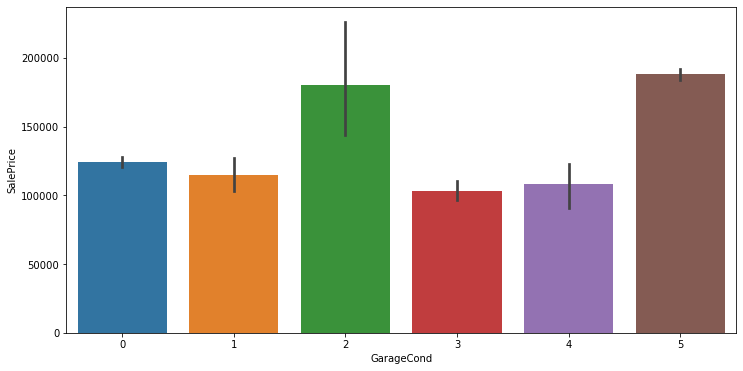

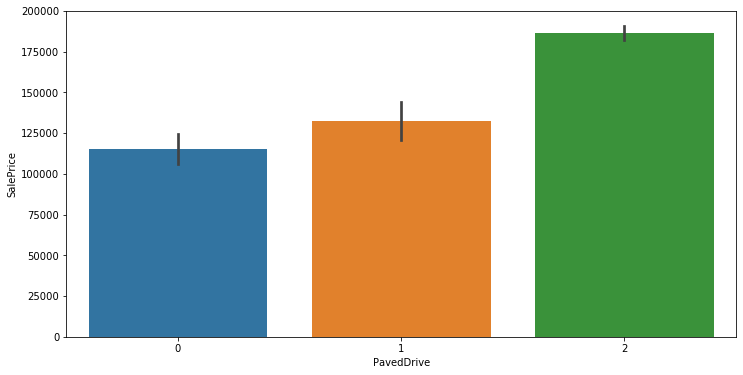

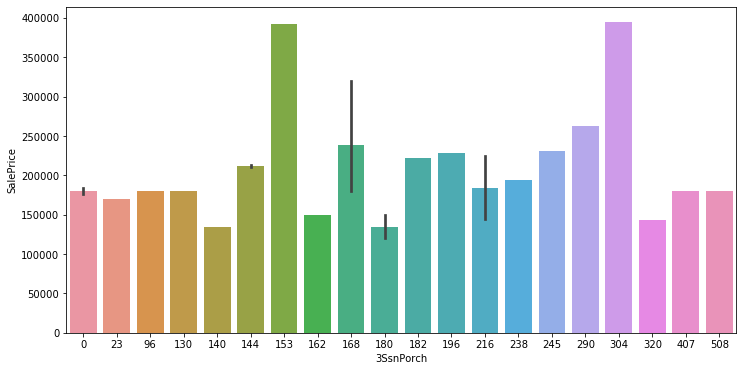

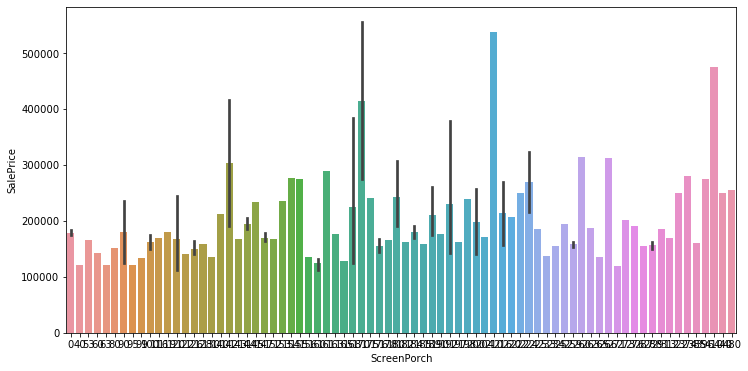

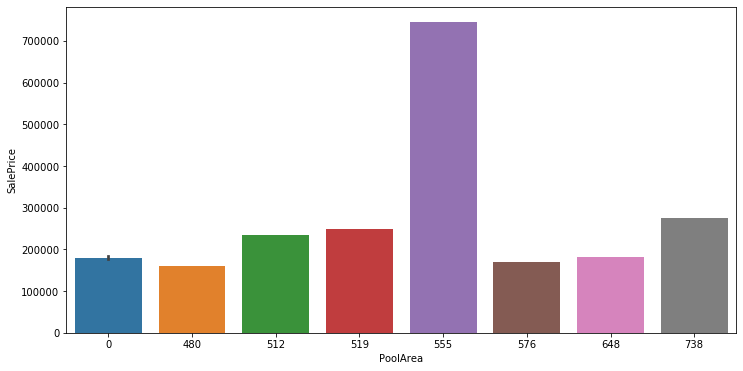

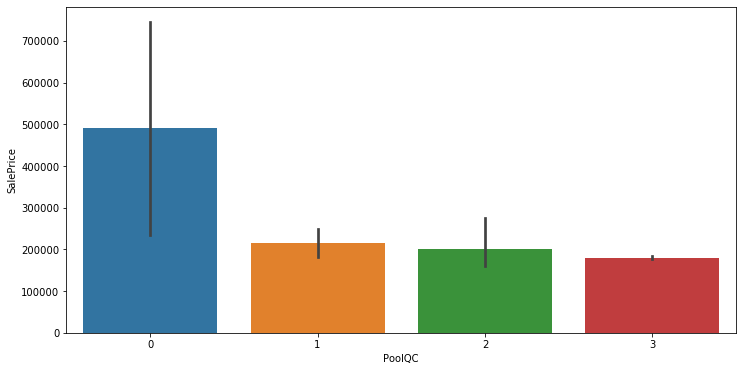

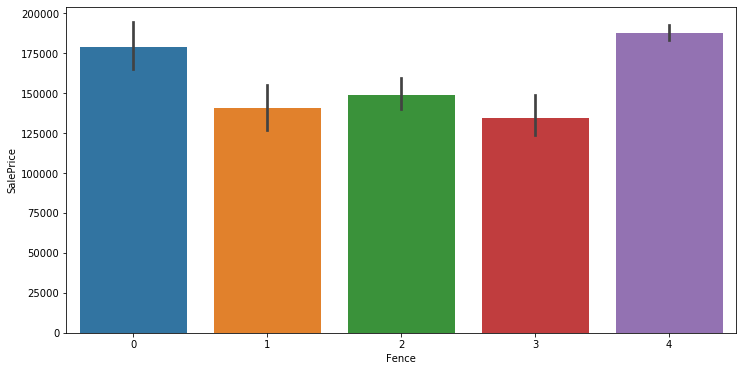

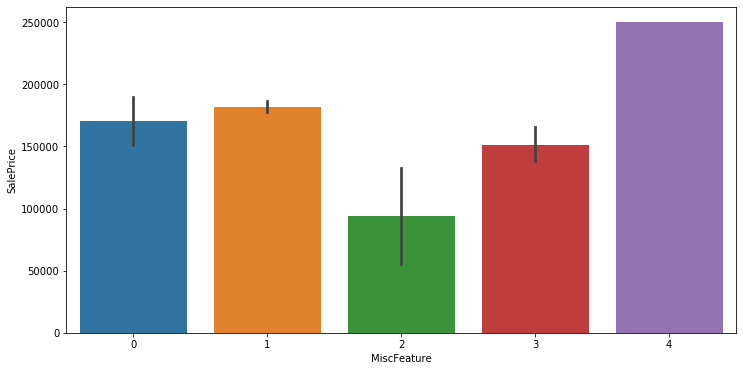

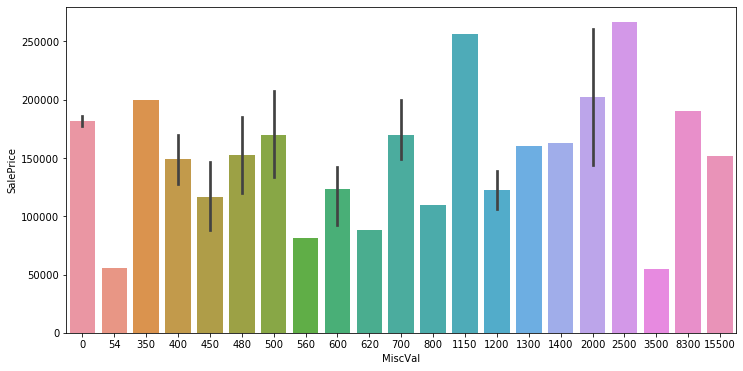

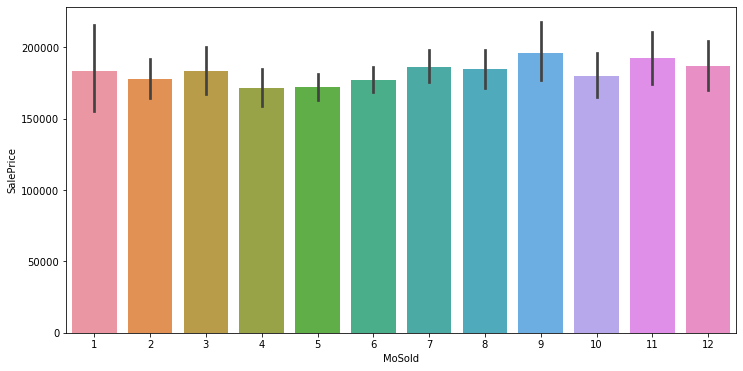

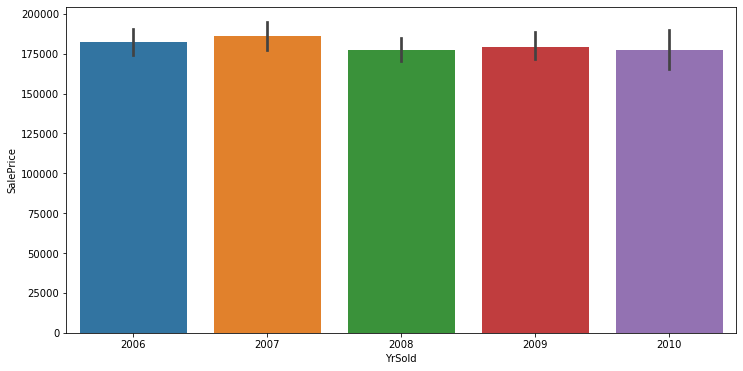

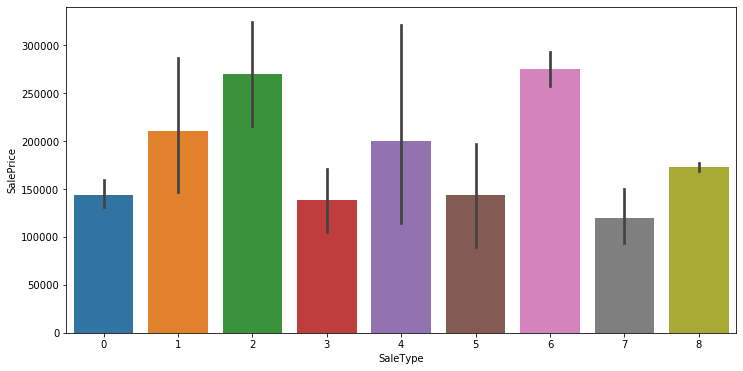

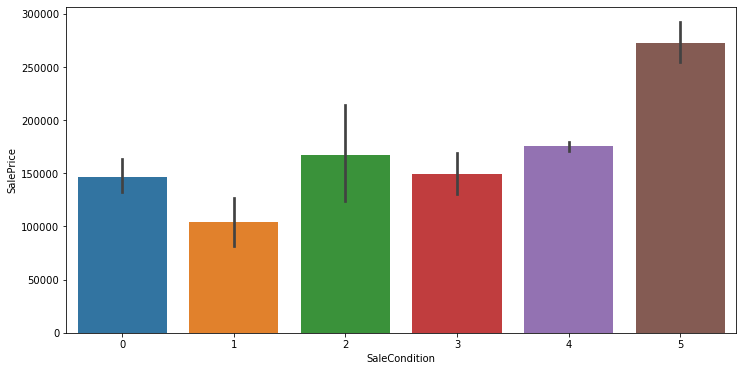

In [34]:
pair_plot_cols = [i for i in X_train.columns if len(X_train[i].unique()) <= 100]
plt.figure(figsize=(12,6))
for i in pair_plot_cols:
    plt.figure(figsize=(12,6))
    sns.barplot(x=X_train[i], y=y_train)

# Model and prediction

In [35]:
X_train, X_val, y_train, y_val = train_test_split( X_train, y_train, test_size=0.33, random_state=42)
#X_train.drop(['Id'],axis = 1, inplace = True)
#X_val.drop(['Id'],axis = 1, inplace = True)
#X_test.drop(['Id'],axis = 1, inplace = True)

## Hyperparamter selection through GridSearchCV

In [91]:
# build a classifier
clf = RandomForestRegressor(n_estimators=100)


# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# use a full grid over all parameters
param_grid = {"max_depth": [10, 12, 20, 25],
              "max_features": [2, 3, 10, 15, 20],
              "min_samples_split":[2, 3],
              "bootstrap": [True, False],
              "n_estimators": [100, 180, 200]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, iid=False)
start = time()
grid_search.fit(X_train, y_train)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

GridSearchCV took 526.80 seconds for 240 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.857 (std: 0.032)
Parameters: {'bootstrap': False, 'max_depth': 25, 'max_features': 15, 'min_samples_split': 3, 'n_estimators': 100}

Model with rank: 2
Mean validation score: 0.855 (std: 0.032)
Parameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 15, 'min_samples_split': 2, 'n_estimators': 100}

Model with rank: 3
Mean validation score: 0.854 (std: 0.030)
Parameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 10, 'min_samples_split': 2, 'n_estimators': 200}

Model with rank: 4
Mean validation score: 0.854 (std: 0.031)
Parameters: {'bootstrap': False, 'max_depth': 25, 'max_features': 10, 'min_samples_split': 3, 'n_estimators': 180}

Model with rank: 5
Mean validation score: 0.854 (std: 0.034)
Parameters: {'bootstrap': False, 'max_depth': 25, 'max_features': 10, 'min_samples_split': 2, 'n_estimators': 200}



## Randomforest Regressor - fitting and prediction

In [137]:
#bdt = RandomForestRegressor(bootstrap = False, max_depth=25, random_state=0, max_features = 15, min_samples_split = 2, n_estimators=180, criterion='mse')
#60.876468430833604 : bdt = RandomForestRegressor(bootstrap = False, max_depth=24, random_state=0,
#max_features = 35, min_samples_split = 3, n_estimators=180, criterion='mse')

#bdt = RandomForestRegressor(bootstrap = False, max_depth = 20, random_state = 0,
#max_features = 20, min_samples_split = 3, n_estimators=100, criterion='mse') - 0.15110
bdt = RandomForestRegressor(bootstrap = False, max_depth = 25, 
         random_state = 0, max_features = 15, min_samples_split = 3, n_estimators=100, criterion='mse')

bdt.fit(X_train, y_train)
predictions = bdt.predict(X_test)
print(bdt.score(X_val, y_val))
print(np.sqrt(mean_squared_error(bdt.predict(X_val), y_val))/len(y_val))

0.8728334447777985
63.39114604729367


## Actual Sale Price vs Predicted Sale Price 

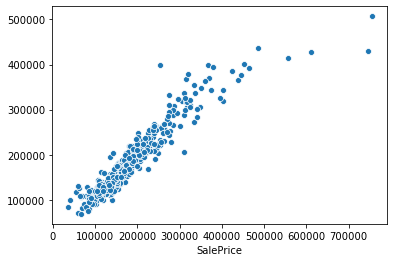

In [139]:
sns.scatterplot(y_val, bdt.predict(X_val))

## Prediction Error

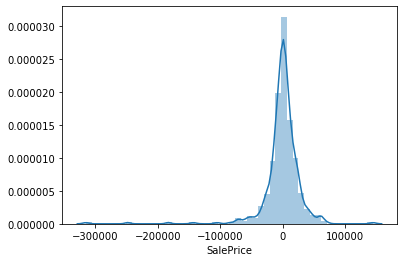

In [140]:
#error = bdt.predict(X_val) - y_val
sns.distplot(bdt.predict(X_val) - y_val)

# Convert predicted values to csv file

In [136]:
sample_submission = pd.read_csv('/Users/varshabhat/Desktop/DL/Data-Science-Portfolio/Housing Price Prediction -  using Regression/sample_submission.csv')
sample_submission.head()
data = {'Id': sample_submission['Id'],'SalePrice': predictions}
df = pd.DataFrame(data)
df.to_csv('submission.csv', index=False, header = True)